#langgraph using inbuilt tools

In [1]:
from langchain_groq import ChatGroq
from langgraph.graph import START,StateGraph,END
from typing import Annotated
from typing import TypedDict
from IPython.display import display,Image
from langgraph.graph.message import add_messages
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode,tools_condition

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
llm=ChatGroq(model="gemma2-9b-it")

In [5]:
llm.invoke("what is gen ai")

AIMessage(content="##  Gen AI: Unlocking the Power of Generative Artificial Intelligence\n\nGen AI, short for **Generative Artificial Intelligence**, is a type of AI that focuses on creating new content rather than simply analyzing existing data. \n\nThink of it like this:\n\n* **Traditional AI:**  Recognizes patterns in data, makes predictions, and classifies information (e.g., recommending a movie based on your past watch history).\n* **Gen AI:**  Learns from patterns in data and uses that knowledge to generate entirely new content (e.g., writing a poem, composing music, designing a logo).\n\n**Here's what makes Gen AI special:**\n\n* **Creativity:** Gen AI can produce original and imaginative content, pushing the boundaries of human creativity.\n* **Efficiency:** It can generate large amounts of content quickly and efficiently, saving time and resources.\n* **Personalization:** Gen AI can be trained on specific datasets to create content tailored to individual needs and preferences.

In [6]:
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [7]:
search=TavilySearchResults()

In [8]:
search.invoke("which team won the 2011 cricket world cup and captain name")

[{'url': 'https://www.winzogames.com/blog/2011-world-cup-indian-team/',
  'content': "Find out the list of team who won 2011 world cup for indiaand what India's 2011 World Cup winning team is up to these days. ... 2011 World Cup India Squad. Mahendra Singh Dhoni (Captain), Virender Sehwag (Vice Captain), Sachin Tendulkar, Gautam Gambhir, Virat Kohli, Yuvraj Singh, Suresh Raina, Yusuf Pathan, Harbhajan Singh, Zaheer Khan, Ashish"},
 {'url': 'https://cricketaddictor.com/editors-picks/indias-2011-world-cup-winning-team-what-are-they-up-to-now/',
  'content': 'Mahendra Singh Dhoni was the captain of the Indian team in the ICC World Cup 2011. Dhoni smashed a brilliant knock when the team needed it the most. In the ICC World Cup 2011 final against Sri Lanka, MS Dhoni played a knock of unbeaten 91 runs while chasing. He also made a partnership of 114 runs with Gautam Gambhir and 54 runs with Yuvraj Singh.'},
 {'url': 'https://www.sportskeeda.com/cricket/2011-odi-world-cup-winning-team-where-a

In [9]:
tools=[search]

In [10]:
model_with_llm=llm.bind_tools(tools=tools)

In [11]:
tool_node=ToolNode(tools=tools)

In [12]:
class AgentState(TypedDict):
    messages:Annotated[list,add_messages]

In [13]:
def ai_assisstance(state:AgentState):
    messages=state["messages"]
    response=model_with_llm.invoke(messages)
    return {"messages":[response]}

In [14]:
graph=StateGraph(AgentState)

In [15]:
graph=StateGraph(AgentState)

In [16]:
graph.add_node("llm",ai_assisstance)
graph.add_node("tools",tool_node)
graph.set_entry_point("llm")

In [17]:
graph.add_conditional_edges(
    "llm",
    tools_condition
)

graph.add_edge("tools","llm")

In [18]:
graph.set_finish_point("llm")

In [19]:
app=graph.compile()

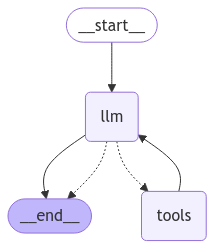

In [20]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except  Exception as e:
    print(e)

In [21]:
app.invoke({"messages":["what is transformer"]})

{'messages': [HumanMessage(content='what is transformer', additional_kwargs={}, response_metadata={}, id='5d1bf550-b80e-4056-a9c2-0fb0efdcbb59'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vgrx', 'function': {'arguments': '{"query":"transformer"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 984, 'total_tokens': 1071, 'completion_time': 0.158181818, 'prompt_time': 0.031111931, 'queue_time': 0.023295643, 'total_time': 0.189293749}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-27d7a388-4eb8-479c-880a-4d5d697a10c9-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'transformer'}, 'id': 'call_vgrx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 984, 'output_tokens': 87, 'total_tokens': 1071}),
  ToolMessage(content='[{"url": "https://www.electricaltechnology